Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries **(required to run for test purpose)**

In [2]:
import os
import shutil
import pandas as pd
import cv2
from PIL import Image
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Open the text file that contains the filepath of images and also create a csv file to store the data in csv file **(not required to run for test purpose)**

In [3]:
with open("/content/drive/MyDrive/Breast-Cancer/formatted.csv", "w") as filet:
  with open("/content/drive/MyDrive/Breast-Cancer/dataset_files.txt", "r") as file:
    files = file.read()
    files = files.replace("BreaKHis_v1\\", "BreaKHis_v1/histology_slides/breast/").replace("\\", "/")
    filet.write(files + "\n")

Open the CSV file and set a name to column header **(not required to run for test purpose**)

In [4]:
col_name = ['filename']
dataset = pd.read_csv("/content/drive/MyDrive/Breast-Cancer/formatted.csv", names = col_name)
dataset

,filename
0,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...
1245,BreaKHis_v1/histology_slides/breast/malignant/...
1246,BreaKHis_v1/histology_slides/breast/malignant/...
1247,BreaKHis_v1/histology_slides/breast/malignant/...
1248,BreaKHis_v1/histology_slides/breast/malignant/...


read the files from the csv file and store the images in two classes (benign & malignant) **(not required to run for test purpose)**

In [5]:
for p in dataset['filename']:
  srcs = "/content/drive/MyDrive/Breast-Cancer/main_data/" + p
  f_name = srcs.split("/")[-1]
  src = cv2.imread(srcs)
  if "benign" in p:
    cv2.imwrite("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/dataset/benign/{}".format(f_name), src)
  else:
    cv2.imwrite("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/dataset/malignant/{}".format(f_name), src)

set the folder of your dataset that contains two folder - bengin and malignant **(not required to run for test purpose)**

In [6]:
img_dir = '/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/dataset/'

In [7]:
dataset = []
label = []

load benign images from the dataset folder and converting them to an array **(not required to run for test purpose)**



In [8]:
benign_path = os.listdir(img_dir + 'benign/')
for i, image_name in enumerate(benign_path):
 if(image_name.split('.') [1] == 'png'):
    image = cv2.imread(img_dir + 'benign/' + image_name, cv2.IMREAD_UNCHANGED)
    image = Image.fromarray(image, 'RGB') 
    image = image.resize((700, 460))
    dataset.append(np.array(image))
    label.append(0)

load malignant images from the dataset folder and converting them to an array **(not required to run for test purpose)**

In [9]:
malignant_path = os.listdir(img_dir + 'malignant/')
for i, image_name in enumerate(malignant_path):
 if(image_name.split('.') [1] == 'png'):
    image = cv2.imread(img_dir + 'malignant/' + image_name, cv2.IMREAD_UNCHANGED)
    image = Image.fromarray(image, 'RGB') 
    image = image.resize((700, 460))
    dataset.append(np.array(image))
    label.append(1)

covert whole image dataset and labels to array **(not required to run for test purpose)**

In [10]:
dataset = np.array(dataset) # (not required to run for test purpose)
label = np.array(label)

In [11]:
dataset.shape  # (not required to run for test purpose)

(1250, 460, 700, 3)

In [12]:
label.shape #  (not required to run for test purpose)

(1250,)

split the dataset into train, validation and test **(not required to run for test purpose)**

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [14]:
X_train, X_rem, y_train, y_rem = train_test_split(dataset, label, train_size = 0.8) # (not required to run for test purpose)

In [15]:
X_train.shape, y_train.shape, X_rem.shape, y_rem.shape # (not required to run for test purpose)

((1000, 460, 700, 3), (1000,), (250, 460, 700, 3), (250,))

In [16]:
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5) # (not required to run for test purpose)

In [17]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape # (not required to run for test purpose)

((1000, 460, 700, 3),
 (1000,),
 (125, 460, 700, 3),
 (125,),
 (125, 460, 700, 3),
 (125,))

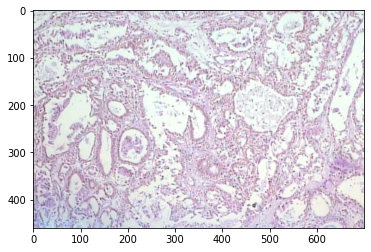

In [18]:
n = 2
img = X_train[n] # (not required to run for test purpose)
plt.imshow(img)

save the splitted dataset in numpy-array format in the google drive **(not required to run for test purpose)**

- run it once for the first time, it will save files. Once you files are saved, you don't want to run it every time.

In [19]:
np.save("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/X_train_no_aug_700x460.npy", X_train)
np.save("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/X_val_no_aug_700x460.npy", X_val)
np.save("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/X_test_no_aug_700x460.npy", X_test)
np.save("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/y_train_no_aug_700x460.npy", y_train)
np.save("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/y_val_no_aug_700x460.npy", y_val)
np.save("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/y_test_no_aug_700x460.npy", y_test)

load the numpy-array files for future **training and testing purpose**

In [20]:
X_train = np.load("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/X_train_no_aug_700x460.npy")
y_train = np.load("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/y_train_no_aug_700x460.npy")

X_test = np.load("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/X_test_no_aug_700x460.npy")
y_test = np.load("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/y_test_no_aug_700x460.npy")

X_val = np.load("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/X_val_no_aug_700x460.npy")
y_val = np.load("/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/npy_files/y_val_no_aug_700x460.npy")

In [21]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1000, 460, 700, 3),
 (1000,),
 (125, 460, 700, 3),
 (125,),
 (125, 460, 700, 3),
 (125,))

run the below cell to test (optional)

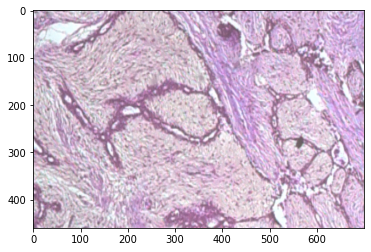

In [22]:
n = 10
img = X_train[n]
plt.imshow(img)

import required libraries **(required to run for test purpose)**

In [ ]:
# Importing all the necessary libraries for building the cnn-model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, Concatenate, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate, SpatialDropout2D
from keras.optimizers import Adam, SGD
from keras.initializers import he_normal, random_normal
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.utils import plot_model

hyper-parameters list **(required to run for test purpose)**

In [ ]:
# Hyperparameters
batch_size = 8
num_classes = 1
epochs = 200
l = 12
num_filter = 24
compression = 0.5
dropout_rate = 0.2
wt_decay = 0.0001

cnn-model **(not required to run for test purpose)**

In [ ]:
# Dense Block
def add_denseblock(input, num_filter = 12, dropout_rate = 0.3):
    global compression
    temp = input
    for _ in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        Conv2D_3_3 = Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same',kernel_regularizer=l2(wt_decay) , kernel_initializer=(random_normal(stddev=np.sqrt(2.0/(9*int(num_filter))))))(relu)
        if dropout_rate>0:
          Conv2D_3_3 = SpatialDropout2D(dropout_rate)(Conv2D_3_3)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

def add_transition(input, num_filter = 12, dropout_rate = 0.3):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(int(int(input.shape[-1])*compression), (1,1), use_bias=False ,padding='same',kernel_regularizer=l2(wt_decay) , kernel_initializer=(random_normal(stddev=np.sqrt(2.0/(9*int(num_filter*compression))))))(relu)
    if dropout_rate>0:
      Conv2D_BottleNeck = SpatialDropout2D(dropout_rate)(Conv2D_BottleNeck)
    avg = AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    
    return avg

def output_layer(input):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='sigmoid', kernel_regularizer=l2(wt_decay))(flat)
    
    return output

cnn-model **(not required to run for test purpose)**

In [ ]:
input = Input(shape=(460, 700, 3))
First_Conv2D = Conv2D(int(num_filter), (3,3), use_bias=False , padding='same', kernel_regularizer=l2(wt_decay), kernel_initializer=(random_normal(stddev=np.sqrt(2.0/(9*num_filter)))))(input)

First_Block = add_denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = add_transition(First_Block, num_filter, dropout_rate)

Second_Block = add_denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = add_transition(Second_Block, num_filter, dropout_rate)

Third_Block = add_denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = add_transition(Third_Block, num_filter, dropout_rate)

Last_Block = add_denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

whole view of the cnn-model **(not required to run for test purpose)**

In [ ]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 460, 700, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_156 (Conv2D)            (None, 460, 700, 24  648         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_156 (Batch  (None, 460, 700, 24  96         ['conv2d_156[0][0]']             
 Normalization)                 )                                                           

Compile the model and also set callbacks function (early stopping and save best model only) **(not required to run for test purpose)**

In [ ]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['acc'])
# early stopping callback to avoid unwanted training
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience= 5,
    verbose= 0,
    mode= "auto",
    baseline=None,
    restore_best_weights=False)

# save the best weights of the model while training
best_model = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/saved_models/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
    verbose=1, 
    monitor='val_loss',
    save_best_only=True,
    mode='auto')

train the model by running the cell in below **(not required to run for test purpose)**

In [ ]:
#Model is fitted using train and validation generator for 200 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200,
                 callbacks=[early_stop, best_model], batch_size = 4, verbose = 1)

Epoch 1/200
253/253 [==============================] - ETA: 0s - loss: 2.5468 - acc: 0.5786
Epoch 1: val_loss improved from inf to 2.45654, saving model to /content/drive/MyDrive/BreaKHis_v1/models_no_aug_original_size/model-001-0.578635-0.663717.h5
253/253 [==============================] - 105s 381ms/step - loss: 2.5468 - acc: 0.5786 - val_loss: 2.4565 - val_acc: 0.6637
Epoch 2/200
253/253 [==============================] - ETA: 0s - loss: 2.3429 - acc: 0.6241
Epoch 2: val_loss improved from 2.45654 to 1.49045, saving model to /content/drive/MyDrive/BreaKHis_v1/models_no_aug_original_size/model-002-0.624135-0.743363.h5
253/253 [==============================] - 95s 375ms/step - loss: 2.3429 - acc: 0.6241 - val_loss: 1.4905 - val_acc: 0.7434
Epoch 3/200
253/253 [==============================] - ETA: 0s - loss: 2.2487 - acc: 0.6558
Epoch 3: val_loss did not improve from 1.49045
253/253 [==============================] - 94s 373ms/step - loss: 2.2487 - acc: 0.6558 - val_loss: 1.5429 - 

load the best model from the google drive **(required to run for test purpose)**

In [ ]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/Breast-Cancer/700x460_no_aug/saved_models/model-014-0.899466-0.808000.h5')

evaluate the model with test dataset **(not mandatory to run for test purpose)**

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 26s 3s/step - loss: 8.3839 - acc: 0.8080


[8.38386344909668, 0.8080000281333923]

load a image from the test dataset for testing the model **(required to run for test purpose)**

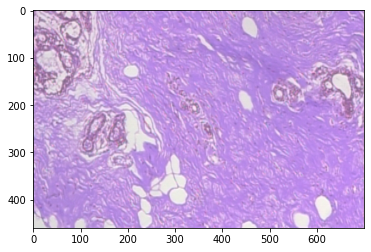

In [ ]:
n = 105
img = X_test[n]
plt.imshow(img)

get the prediction for the displayed image--

1. if prediction value is **higher than .5** then the predicted class in **malignant**
2. if prediction value is **lower than .5**, then the predicted class is **benign**

In [ ]:
input_img = np.expand_dims(img, axis = 0)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

1/1 [==============================] - 0s 29ms/step
The prediction for this image is:  [[0.923391]]
The actual label for this image is:  1


upload an image for testing the model and set the path of the image in the cell below

In [ ]:
test_img = cv2.imread("path-to-the image goes here", cv2.IMREAD_UNCHANGED) 
image = Image.fromarray(test_img, 'RGB') 
image = image.resize((700, 460))
image = np.array(image)
plt.imshow(image)
input_img = np.expand_dims(image, axis = 0)
score = model.predict(input_img)

if score > .5:
  print("The predicted score for this image is  : ", score)
  print("The predicted class for this images is : Malignant")
else:
  print("The predicted score for this image is  : ", score)
  print("The predicted class for this images is : Benign")

get the value of confusion metrix

In [ ]:
mythreshold  = 0.5
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)

4/4 [==============================] - 2s 624ms/step
[[46 14]
 [10 55]]


get the scores of F1, recall, precision and many more metrics

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
TP, TN, FP, FN = cm[0, 0], cm[1, 1], cm[1, 0], cm[0, 1]
print("TP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)
acc, sn, sp = 1. * (TP + TN) / (TP + TN + FP + FN), 1. * TP / (TP + FN), 1. * TN / (TN + FP)
f1 = f1_score(y_test, y_pred, average='binary')
recall = 1. * TP/(TP+FN)
precision = 1. * TP/(TP+FP)
f1 = (2. * recall * precision)/(recall+precision)
print("acc: {}, sn: {}, sp: {}, f1: {}".format(acc, sn, sp, f1))
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-Score: ", f1)

TP: 46
FP: 10
TN: 55
FN: 14
acc: 0.808, sn: 0.7666666666666667, sp: 0.8461538461538461, f1: 0.793103448275862
Recall:  0.7666666666666667
Precision:  0.8214285714285714
F1-Score:  0.793103448275862


plot the confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot the confusion matrix

Confusion matrix, without normalization
[[46 14]
 [10 55]]


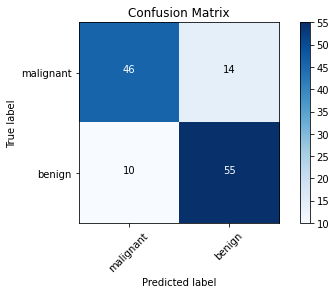

In [ ]:
#cm_plot_labels = ['benign', 'malignant']
cm_plot_labels = ['malignant', 'benign']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')